#### Lv3 EDA python 와인 품질 분류 문제

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [40]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [41]:
# train.shape
# test.shape

In [44]:
train = pd.read_csv('train.csv')

# Scailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579,0.0,1.0


In [45]:
random_classifier = RandomForestClassifier()

In [46]:
X = train.drop(columns = ['quality'])
y = train['quality']

In [47]:
random_classifier.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# 교차 검증 정의 K-Fold 

In [34]:
# # 2/7 EDA 결측치 확인
# train.isnull().sum()
# test.isnull().sum()

In [35]:
# 3/7 수치 데이트 특성보기 describe()
# train.describe()

In [36]:
# # 4/7 변수 분포 시각화
# import matplotlib
# # import matplotlib.pyplot as plt
# import seaborn as sns

# # 주피터노트북에서 결과 출력 설정
# %matplotlib inline

# # 글꼴 설정
# plt.rc('font',  family = 'NanumBarunGothic')

# # 마이너스 기호 출력
# plt.rc('axes', unicode_minus = False)

# # 분석에 문제가 없는 경고 메시지는 숨긴다
# import warnings
# warnings.filterwarnings('ignore')

In [7]:
# # 시각화를 진행할 때는 보통 copy()
# train_copy = train.copy()
# train_copy.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


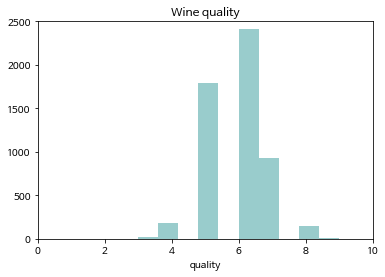

In [8]:
# # distplot() 이용
# # 타깃 변수 (와인 품질) 분포 시각화 (kde :'그래프에 선을 출력할지 여부 , bins : '출력할 막대그래프 갯수)
# sns.distplot(train_copy['quality'], color = 'teal', kde = False, bins =10)
# # x축 최솟값, x축 최댓값, y축 최솟값, y축 최댓값 지정
# plt.axis([0,10,0,2500])
# # 그래프 제목 지정
# plt.title("Wine quality")
# # 그래프 그려
# plt.show()

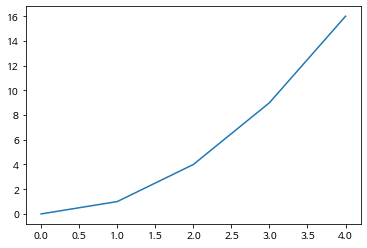

In [9]:
# # 5/7 matplotlib 선 그래프 시각화 plot()
# x_values = [0,1,2,3,4]
# y_values = [0,1,4,9,16]
# plt.plot(x_values,y_values)
# plt.show()

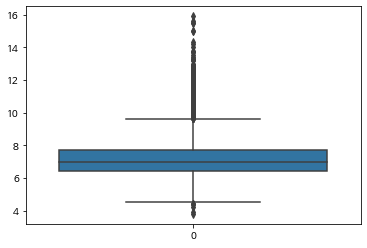

In [11]:
# # 전처리 1/4 이상치 탐지
# # 이상치 데이터는 모델의 성능을 크게 떨어트림ㅜㅜ -> 이상치 탐지 필수!
# # 대표적인 방법 : IQR (Inter Qunatile Range ; 사분위 값의 편차 이용)
# # 이상치 탐지 : 주로 boxplot 활용
# sns.boxplot(data = train_copy['fixed acidity'])

In [12]:
# # 전처리 2/5 이상치 제거
# # IQR을 활용해서 이상치 제거 
# # IQR : 3분위 수 (75%에 위치한 값)-1분위 수 (25%에 위치한 값)
# quantile_25 = np.quantile(train_copy['fixed acidity'],0.25)
# quantile_75 = np.quantile(train_copy['fixed acidity'],0.75)
# IQR = quantile_75 - quantile_25
# min = quantile_25-1.5*IQR  
# max = quantile_75+1.5*IQR
# # fixed acidity가 min 보다 크고, max보다 작은 값들만 train_copy_2에 저장
# train_copy_2 = train_copy[(min <= train_copy['fixed acidity']) & (train_copy['fixed acidity'] <= max)]

In [13]:
# # train_copy.shape (5497,14)
# train_copy_2.shape # (5203,14)

(5203, 14)

In [14]:
# # 몇 개의 이상치가 있는지 계산
# train_copy.shape[0] - train_copy_2.shape[0]

294

In [15]:
# 3/4 전처리 수치형 데이터 정규화
# 의사결정나무/랜덤포레스트와 같은 '트리 기반 모델'은 대소 비교를 통해서 구분하므로 숫자의 단위에 크게 영향을 받지 않음
# Logistic Regression, Lasso와 같은 '평활 함수 모델'은 숫자의 크기와 단위의 영향을 받음
# 수치형 데이터 정규화를 통해 모든 모델에 잘 어울리는 데이터를 만들고자 함

# 수치형 데이터 정규화 방법 중 'Min Max Scaling' 기법은 상당히 간단함.
# 가장 작은 값은 0으로, 가장 큰 값은 1로 만들어주는 방법
# 그 사이의 값들은 비율에 따라 0~1 사이에 분포함

In [16]:
# train_copy_2.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000
mean,2753.771670,5.821065,7.004132,0.332852,0.309366,5.573131,0.054088,31.337113,119.578897,0.994472,3.222862,0.521893,10.504133
std,1587.326459,0.868565,0.906623,0.162106,0.140360,4.828254,0.033831,17.536054,54.483795,0.002926,0.161715,0.143725,1.201914
min,0.000000,3.000000,4.500000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1380.500000,5.000000,6.400000,0.220000,0.240000,1.800000,0.037000,18.000000,86.000000,0.992160,3.110000,0.430000,9.500000
50%,2754.000000,6.000000,6.900000,0.290000,0.300000,3.300000,0.046000,30.000000,121.000000,0.994600,3.210000,0.500000,10.300000
75%,4129.500000,6.000000,7.500000,0.390000,0.380000,8.300000,0.060000,42.000000,157.000000,0.996660,3.330000,0.590000,11.300000
max,5496.000000,9.000000,9.600000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.200000


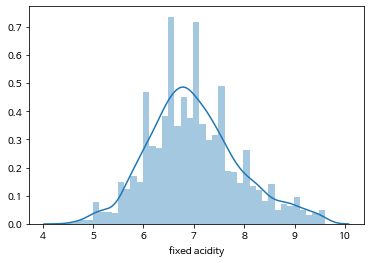

In [17]:
# # distplot 활용해 도수 분포 확인
# sns.distplot(train_copy_2['fixed acidity'])

In [18]:
# # MinMaxScaler 를 'scaler'라는 변수에 지정
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# # scaler 학습
# scaler.fit(train_copy_2[['fixed acidity']])

# # scaler를 통해 train_copy_2의 'fixed acidity를 'Scaled fixed acidity' 라는 컬럼에 지정하장
# train_copy_2['Scaled fixed acidity']=scaler.transform(train_copy_2[['fixed acidity']])

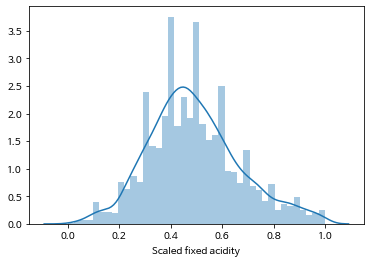

In [19]:
# # displot 찍어
# sns.distplot(train_copy_2['Scaled fixed acidity'])

In [20]:
# 4/4 전처리 원-핫 인코딩
# 컴터는 '문자'로 된 데이터 학습 불가
# 'type'과 같은 피처들은 컴퓨터가 읽어서 학습할 수 있도록 '인코딩'이 필수
# One-Hot Encoding 가보자고! : 하나만 Hot하고 나머지는 Cold한 데이터로 자신에게 맞는 것은 '1', 아닌 나머지는 '0'으로 바꾸어 줌

In [21]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()

# # 'type' 피처를 onehotencoder로 학습
# encoder.fit(train_copy_2[['type']])

# # encoder를 사용해 train_copy_2 의 'type' 피처를 변환해 'onehot'이라는 변수에 젖아
# onehot = encoder.transform(train_copy_2[['type']])

In [22]:
# onehot

# # onehot 이라는 변수는 array 형태로 변환
# onehot = onehot.toarray()

In [23]:
# # onehot 이라는 변수를 DataFrame 형태로 변환
# onehot = pd.DataFrame(onehot)
# onehot.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [24]:
# # encoder 의 get_featrue_names() 를 사용해 column 이름 변경
# onehot.columns = encoder.get_feature_names()

# onehot.head()

,x0_red,x0_white
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [25]:
# # onehot 을 원본 데이터인 train에 병합
# train_copy_2 = pd.concat([train_copy_2, onehot], axis=1)
# train_copy_2.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,Scaled fixed acidity,x0_red,x0_white
0,0.0,5.0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0.215686,0.0,1.0
1,1.0,5.0,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,0.843137,1.0,0.0
2,2.0,5.0,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,0.666667,0.0,1.0
3,3.0,6.0,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,0.490196,0.0,1.0
4,4.0,6.0,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,0.647059,0.0,1.0


In [26]:
# train_copy_2 = train_copy_2.drop(columns = ['type'])

# train_copy_2.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0.0,5.0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.215686,0.0,1.0
1,1.0,5.0,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.843137,1.0,0.0
2,2.0,5.0,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.666667,0.0,1.0
3,3.0,6.0,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.490196,0.0,1.0
4,4.0,6.0,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.647059,0.0,1.0


In [27]:
# train_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5486 entries, 0 to 5496
Data columns (total 16 columns):
index                   5203 non-null float64
quality                 5203 non-null float64
fixed acidity           5203 non-null float64
volatile acidity        5203 non-null float64
citric acid             5203 non-null float64
residual sugar          5203 non-null float64
chlorides               5203 non-null float64
free sulfur dioxide     5203 non-null float64
total sulfur dioxide    5203 non-null float64
density                 5203 non-null float64
pH                      5203 non-null float64
sulphates               5203 non-null float64
alcohol                 5203 non-null float64
Scaled fixed acidity    5203 non-null float64
x0_red                  5203 non-null float64
x0_white                5203 non-null float64
dtypes: float64(16)
memory usage: 728.6 KB


In [28]:
# # 단순화 버전
# encoder = OneHotEncoder()
# onehot = pd.DataFrame(encoder.fit_transform(train_copy_2[['type']]).toarray(), columns = encoder.get_feature_names())
# train_copy_2 = pd.condat([train_copy_2,onehot],axis =1).drop(columns = [type])


In [29]:
# 1/4 모델링 랜덤포레스트
# 와인 품질 분류이므로 '분류 모델'사용!

from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier()
random_classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
# 2/4 모델링 랜덤포레스트 모델 실습
onehot.head()
# x 라는 변수에 onehot의 'quality'피처를 제거하고 저장하자
X = train_copy_2.drop(columns = ['quality'])
# y 라는 변수에 onehot의 'quality' 피처를 저장하자
y = train_copy_2['quality']

In [31]:
y

0       5.0
1       5.0
2       5.0
3       6.0
4       6.0
       ... 
5492    5.0
5493    6.0
5494    7.0
5495    5.0
5496    6.0
Name: quality, Length: 5486, dtype: float64

In [32]:
# # RandomClaasifier를 X와 Y를 이용해 학습하자
# random_classifier.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [33]:
# train_copy_2.isnull().sum()

index                   283
quality                 283
fixed acidity           283
volatile acidity        283
citric acid             283
residual sugar          283
chlorides               283
free sulfur dioxide     283
total sulfur dioxide    283
density                 283
pH                      283
sulphates               283
alcohol                 283
Scaled fixed acidity    283
x0_red                  283
x0_white                283
dtype: int64